In [86]:
# Import necessary libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
%matplotlib inline

In [87]:
df = pd.read_csv("sales_data_sample.csv")

In [88]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 1406 to 2420
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PRICEEACH  219 non-null    float64
 1   SALES      219 non-null    float64
dtypes: float64(2)
memory usage: 5.1 KB


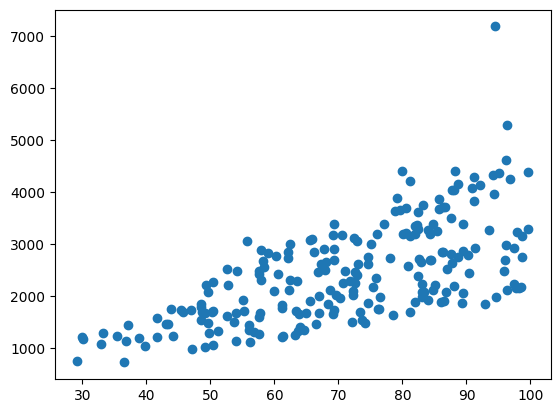

In [89]:
df_sales = df[["PRICEEACH", "SALES"]].sample(400)
df_sales = df_sales[df_sales.PRICEEACH < 100]

plt.scatter(df_sales.PRICEEACH.values, df_sales.SALES.values)
df_sales.info()

In [90]:
x = df_sales[["PRICEEACH"]].values / 100 # dfable

y = df_sales["SALES"].values / 100# seriesable

In [91]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.6, random_state=66)

x_train.shape

(131, 1)

Loop through k values

In [92]:
k_value_min = 1
k_value_max = 70

k_list = np.linspace(k_value_min, k_value_max, k_value_max)
k_list.dtype

dtype('float64')

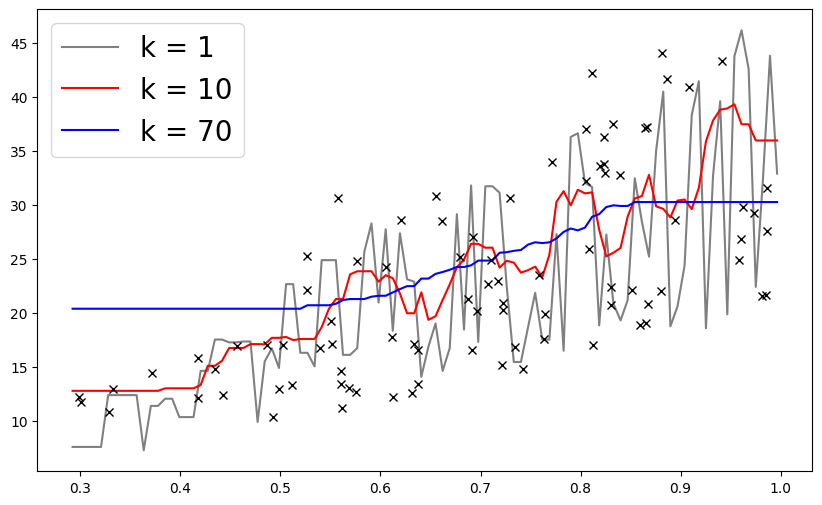

In [93]:
fig, ax = plt.subplots(figsize=(10,6))

knn_dict = {}

j=0

for k_value in k_list:

    model = KNeighborsRegressor(n_neighbors=int(k_value))
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)

    MSE = mean_squared_error(y_test, y_pred)

    knn_dict[k_value] = MSE

    colors = ['grey', 'r', 'b']
    if k_value in [1, 10, k_value_max]:

        xvals = np.linspace(x.min(), x.max(), 100).reshape(-1,1)
        ypreds = model.predict(xvals)
        ax.plot(xvals, ypreds, '-', label=f"k = {int(k_value)}", color=colors[j])
        j+=1

ax.legend(loc='upper left', fontsize=20)
ax.plot(x_test, y_test, "x", label="test", color='k')

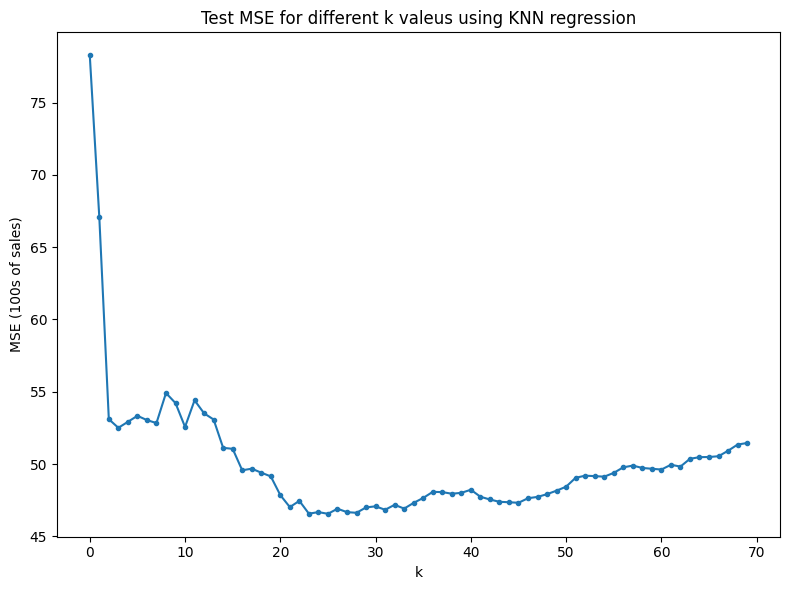

In [96]:
plt.figure(figsize=(8,6))
plt.plot(knn_dict.values(), '.-')

plt.xlabel("k")
plt.ylabel("MSE (100s of sales)")
plt.title("Test MSE for different k valeus using KNN regression")
plt.tight_layout()

The above gives a nice visual representation of how MSE changes with k. However, it would be nice to calculate the min MSE, as well as R2

In [103]:
min_mse = min(knn_dict.values())

best_model = [key for (key, value) in knn_dict.items() if value == min_mse]

print (f"Best k value is {best_model[0]} with a MSE of {min_mse}")


Best k value is 26.0 with a MSE of 46.557859460002355


Calculate R2 of the best model


In [106]:
model = KNeighborsRegressor(n_neighbors=int(best_model[0]))
model.fit(x_train, y_train)

y_pred_test  = model.predict(x_test)

r2 = r2_score(y_test, y_pred_test)
r2

0.3937595953356451